# NOAA-20 NUCAPS Profile 1222 UTC 23 October 2022

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import re
from six import StringIO
from six import BytesIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 50.3N/5.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 8 . 0 1 5 6 2   1 9 6 . 8 2 8 1 2   2 1 1 . 4 2 1 8 8   2 2 8 . 1 2 5   2 4 2 . 4 5 3 1 2   2 5 2 . 1 7 1 8 8   2 5 7 . 6 4 0 6 2   2 6 0 . 3 1 2 5   2 6 1 . 1 0 9 3 8   2 6 0 . 2 0 3 1 2   2 5 8 . 0 4 6 8 8   2 5 1 . 7 1 8 7 5   2 4 5 . 0 3 1 2 5   2 3 9 . 7 5   2 3 4 . 7 8 1 2 5   2 3 1 . 1 4 0 6 2   2 2 7 . 4 5 3 1 2   2 2 4 . 4 2 1 8 8   2 2 1 . 6 4 0 6 2   2 1 9 . 6 2 5   2 1 8 . 0 6 2 5   2 1 7 . 0 9 3 7 5   2 1 6 . 2 5   2 1 5 . 5 6 2 5   2 1 4 . 8 9 0 6 2   2 1 4 . 1 2 5   2 1 3 . 4 5 3 1 2   2 1 2 . 8 9 0 6 2   2 1 2 . 4 0 6 2 5   2 1 2 . 0 7 8 1 2   2 1 1 . 7 6 5 6 2   2 1 1 . 6 0 9 3 8   2 1 1 . 4 8 4 3 8   2 1 1 . 4 5 3 1 2   2 1 1 . 4 2 1 8 8   2 1 1 . 6 2 5   2 1 1 . 9 3 7 5   2 1 2 . 4 8 4 3 8   2 1 3 . 1 8 7 5   2 1 4 . 2 3 4 3 8   2 1 5 . 3 9 0 6 2   2 1 6 . 3 2 8 1 2   2 1 7 . 1 0 9 3 8   2 1 7 . 8 4 3 7 5   2 1 8 . 4 6 8 7 5   2 1 9 . 0 6 2 5   2 1 9 . 6 7 1 8 8   2 2 0 . 1 8 7 5   2 2 0 . 5 1 5 6 2   2 2 0 . 4 6 8 7 5   2 2 0 . 3 2 8 1 2   2 2 0 . 0 3 1 2 5   2 1 9 . 5 1 5 6 2   2 1 8 . 9 6 8 7 5   2 1 8 . 5 7 8 1 2   2 1 8 . 3 1 2 5   2 1 8 . 2 6 5 6 2   2 1 8 . 5   2 1 9 . 1 0 9 3 8   2 1 9 . 7 5   2 2 0 . 8 2 8 1 2   2 2 2 . 1 5 6 2 5   2 2 3 . 7 5   2 2 5 . 5 3 1 2 5   2 2 8 . 0 3 1 2 5   2 3 0 . 6 5 6 2 5   2 3 3 . 3 9 0 6 2   2 3 6 . 1 4 0 6 2   2 3 8 . 9 3 7 5   2 4 1 . 7 1 8 7 5   2 4 4 . 4 6 8 7 5   2 4 7 . 3 2 8 1 2   2 5 0 . 1 2 5   2 5 2 . 8 4 3 7 5   2 5 5 . 8 1 2 5   2 5 8 . 7 3 4 3 8   2 6 1 . 5 6 2 5   2 6 4 . 2 1 8 7 5   2 6 6 . 8 4 3 7 5   2 6 9 . 3 1 2 5   2 7 1 . 2 5   2 7 3 . 4 3 7 5   2 7 5 . 8 7 5   2 7 7 . 3 4 3 7 5   2 7 8 . 7 1 8 7 5   2 8 0 . 0 3 1 2 5   2 8 1 . 2 9 6 8 8   2 8 2 . 4 5 3 1 2   2 8 3 . 5 9 3 7 5   2 8 4 . 8 4 3 7 5   2 8 6 . 2 9 6 8 8   2 8 7 . 5   2 8 8 . 9 5 3 1 2   2 9 0 . 4 0 6 2 5   2 9 1 . 7 8 1 2 5   2 9 4 . 4 0 6 2 5"
dewpt = "1 4 5 . 1 0 3 2 9   1 5 0 . 7 4 6 4 4   1 5 4 . 1 1 2 9 8   1 5 7 . 2 1 7 5 1   1 5 9 . 9 8 4 9 5   1 6 2 . 2 8 3 5 8   1 6 4 . 1 2 9 6 1   1 6 5 . 6 6 2 7 7   1 6 6 . 9 5 8 9 8   1 6 8 . 1 0 1 6 5   1 6 9 . 1 3 7 2 2   1 7 0 . 1 0 4 4 9   1 7 1 . 0 4 7 1 8   1 7 1 . 9 6 1 9 1   1 7 2 . 8 4 1 5 5   1 7 3 . 6 8 3 1 8   1 7 4 . 4 8 4   1 7 5 . 2 4 3 0 7   1 7 5 . 9 6 3 5   1 7 6 . 6 6 2 2 2   1 7 7 . 3 3 6 1 4   1 7 7 . 9 8 8 7 2   1 7 8 . 6 2 7 8 2   1 7 9 . 2 5 7 9 5   1 7 9 . 8 6 0 2 3   1 8 0 . 4 4 7 3   1 8 1 . 0 0 8 9 3   1 8 1 . 5 3 6 4   1 8 2 . 0 4 6 9 4   1 8 2 . 5 3 4 2 4   1 8 2 . 9 9 2 2 8   1 8 3 . 4 2 9 2 8   1 8 3 . 8 6 4 6 7   1 8 4 . 2 9 2 4 5   1 8 4 . 7 3 4 5 4   1 8 5 . 1 9 1 7 6   1 8 5 . 6 4 2 6 5   1 8 6 . 1 0 2 6 6   1 8 6 . 5 7 1 7   1 8 7 . 0 0 1 5 4   1 8 7 . 4 4 5 5 1   1 8 7 . 8 9 2 6 2   1 8 8 . 3 3 7 3 9   1 8 8 . 7 6 2 9 7   1 8 9 . 1 7 4 9   1 8 9 . 6 7 5 5 7   1 8 9 . 8 2 9 1   1 9 0 . 0 0 3 9   1 9 0 . 5 8 2 4 6   1 9 1 . 5 8 2 1 4   1 9 2 . 7 4 0 7 4   1 9 4 . 9 7 2 4 6   1 9 8 . 1 9 3 8   2 0 0 . 1 5 9 3 2   2 0 2 . 9 5 0 2   2 0 5 . 2 0 1 3 5   2 0 7 . 2 3 1 5 2   2 0 9 . 2 0 1 0 8   2 1 1 . 2 1 6 7 4   2 1 3 . 1 9 5 5 4   2 1 5 . 0 7 3 4 4   2 1 6 . 7 7 9 9 8   2 1 8 . 5 9 2 2   2 2 0 . 4 3 3 8 8   2 2 3 . 3 4 3 9 6   2 2 6 . 3 7 5 6 9   2 2 9 . 4 3 6 2   2 3 2 . 3 8 4 6   2 3 5 . 4 5 4 2 1   2 3 8 . 5 3 4 0 9   2 4 1 . 0 0 5 6 9   2 4 3 . 5 1 9 7 4   2 4 5 . 9 2 0 0 1   2 4 7 . 9 2 6 2 1   2 5 0 . 0 3 9 7 5   2 5 2 . 1 6 6 5   2 5 3 . 6 2 3 0 8   2 5 5 . 1 1 4 7 9   2 5 6 . 6 7 8 8   2 5 8 . 5 0 6 9 3   2 5 9 . 9 6 1 6 7   2 6 2 . 3 2 9 5 3   2 6 4 . 8 1 4 2 7   2 6 7 . 1 1 6 8 2   2 6 9 . 7 3 1 1 4   2 7 2 . 1 1 6 7 3   2 7 4 . 4 8 9 0 7   2 7 6 . 8 0 3 5 6   2 7 8 . 8 1 8 2   2 8 0 . 4 0 5 8 8   2 8 1 . 7 6 3 6 4   2 8 2 . 4 5 3 8 6   2 8 2 . 5 3 6 7 4   2 8 2 . 9 0 1 2 5   2 8 3 . 0 7 2 9 7   2 8 2 . 2 3 0 6 8"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
height_km = "prof_hgt.txt"
height_km = np.loadtxt(height_km, dtype='f', unpack=True)
print(height_km)
height_m = height_km * 1000
print(height_m,len(height_m))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 852.7)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1300
delta_zkm = 1.3
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    

P_level_upper = pressure_pa[idx_pup]
P_level_lower = pressure_pa[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 0
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP    
MWPI, WGP  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = 0
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")
print("Sounding profile with virtual temperature")
print("")
data_sharppy=dict(zip(('pres','hght','tempvirt','dwpt'),(pressure_pa, height_m, tempvirt_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'tempvirt', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "tempvirt": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

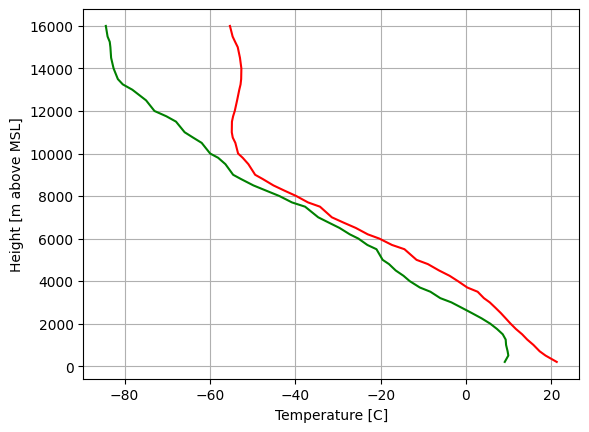

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


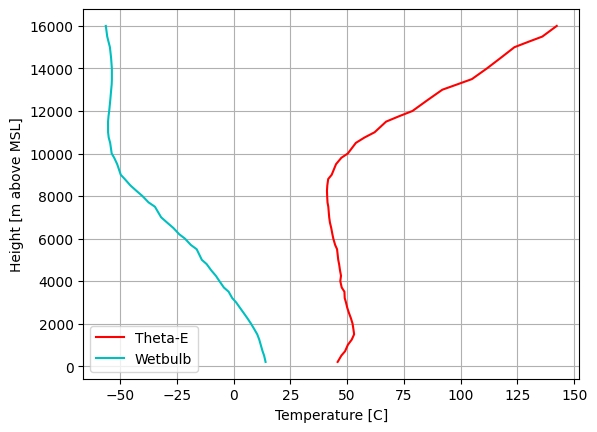

Most-Unstable CAPE: 1121.07
Surface-based CAPE: 263.04
Most-Unstable LCL: 1868.5
Most-Unstable LFC: 4372.5339073688665
Most-Unstable EL: 10300.0
Most-Unstable LI: -3.14
670-850 mb Lapse Rate: 5.69
850-950 mb Lapse Rate: 5.4
Maximum Lapse Rate: 9.89
MWPI: 1.4
T Totals: 55.09
K-index: 28.94
TEI: 7.26
MWPI WGP (kt): 36.33
SB CAPE =  263.0373714247808
MU CAPE =  1121.0743608580221
CAPE Ratio =  0.77
Elevated convection


In [4]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwi = mwpi(prof)
mwp = round(mwi,2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)

#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

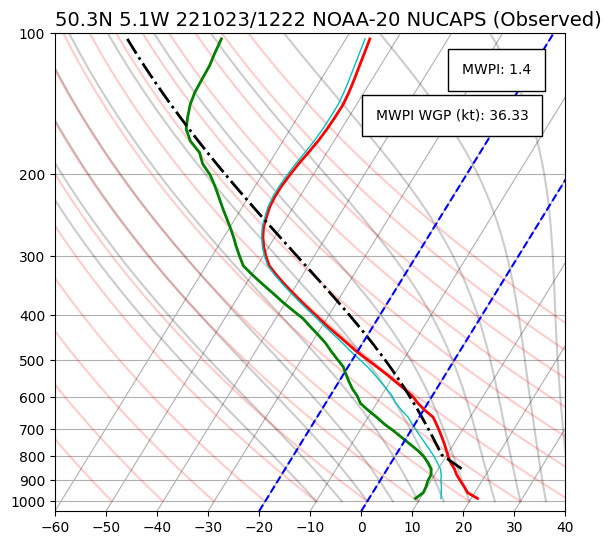

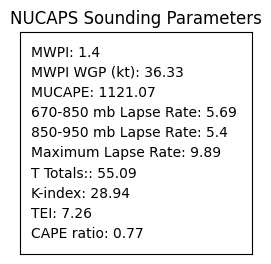

In [5]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('50.3N 5.1W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

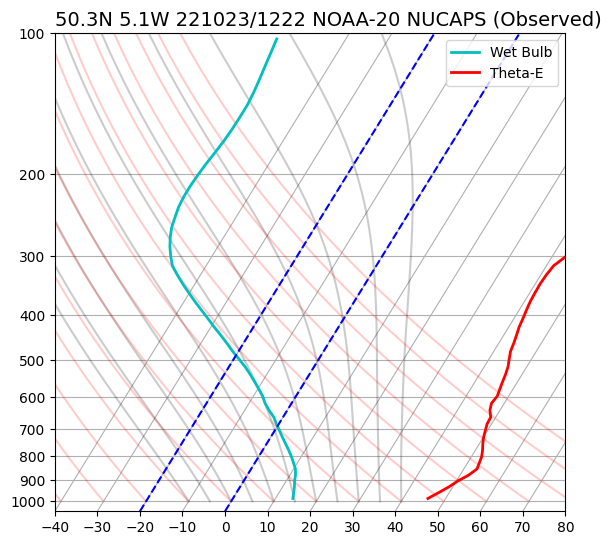

In [4]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('50.3N 5.1W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

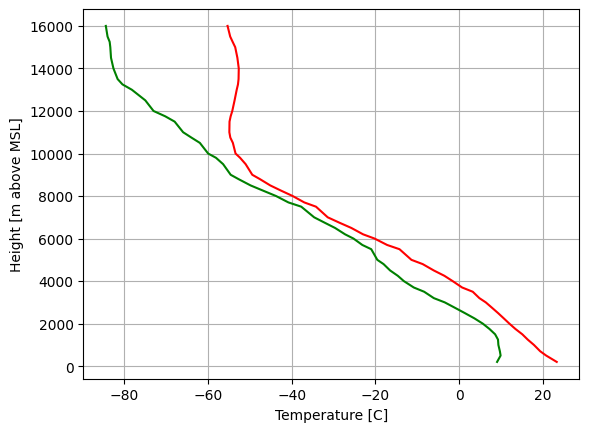

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


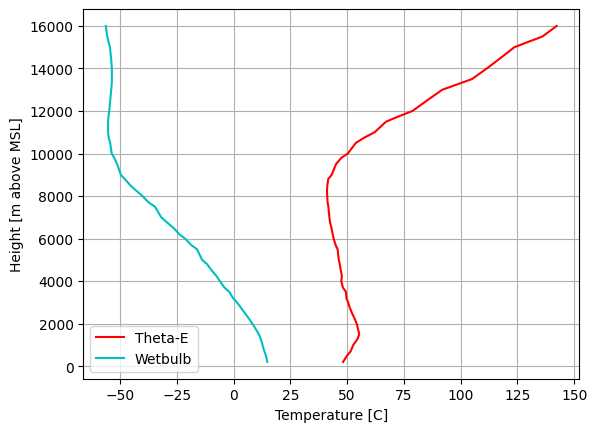

Most-Unstable CAPE: 1435.99
Surface-based CAPE: 1435.99
Most-Unstable LCL: 2093.36
Most-Unstable LFC: 4169.084990278967
Most-Unstable EL: 10400.93
Most-Unstable LI: -4.18
670-850 mb Lapse Rate: 6.42
850-950 mb Lapse Rate: 5.64
Maximum Lapse Rate: 10.01
MWPI: 1.79
T Totals: 56.71
K-index: 29.95
TEI: 7.92
MWPI WGP (kt): 37.27
SB CAPE =  501.7097496964833
MU CAPE =  1435.9896373082815
CAPE Ratio =  0.65
Hybrid Surface-based/elevated convection


In [6]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222_Tv.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

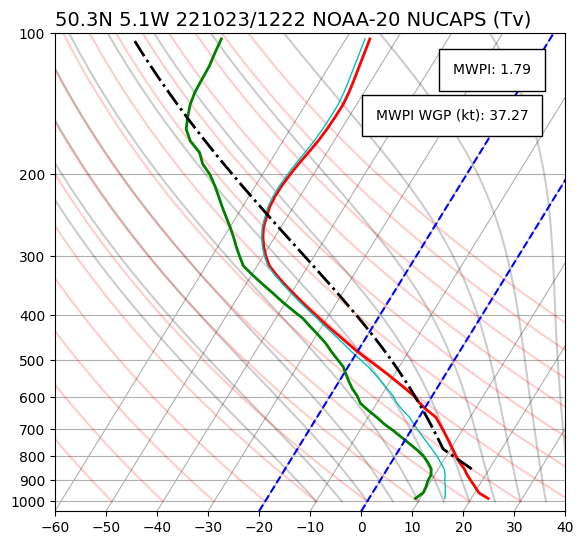

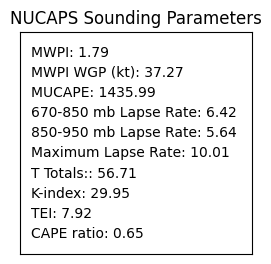

In [7]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('50.3N 5.1W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

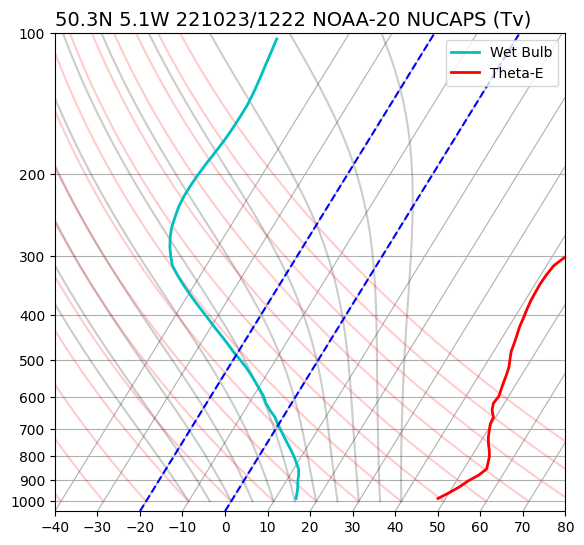

In [7]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('50.3N 5.1W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

# NOAA-20 NUCAPS Profile 1222 UTC 23 October 2022

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import re
from six import StringIO
from six import BytesIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 51N/0.1W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 6 . 8 1 2 5   1 9 5 . 7 1 8 7 5   2 1 0 . 2 3 4 3 8   2 2 6 . 8 2 8 1 2   2 4 1 . 0 3 1 2 5   2 5 0 . 5 7 8 1 2   2 5 5 . 8 7 5   2 5 8 . 3 9 0 6 2   2 5 9 . 0 3 1 2 5   2 5 8 . 2 1 8 7 5   2 5 5 . 8 7 5   2 5 1 . 2 3 4 3 8   2 4 6 . 1 8 7 5   2 4 1 . 5 9 3 7 5   2 3 6 . 9 6 8 7 5   2 3 3 . 1 7 1 8 8   2 2 9 . 2 8 1 2 5   2 2 5 . 7 5   2 2 2 . 3 7 5   2 1 9 . 5 7 8 1 2   2 1 7 . 1 8 7 5   2 1 5 . 6 2 5   2 1 4 . 2 9 6 8 8   2 1 3 . 2 6 5 6 2   2 1 2 . 5 1 5 6 2   2 1 2 . 1 4 0 6 2   2 1 1 . 9 8 4 3 8   2 1 2 . 1 2 5   2 1 2 . 2 8 1 2 5   2 1 2 . 4 5 3 1 2   2 1 2 . 5 4 6 8 8   2 1 2 . 6 8 7 5   2 1 2 . 7 3 4 3 8   2 1 2 . 6 0 9 3 8   2 1 2 . 4 2 1 8 8   2 1 2 . 4 0 6 2 5   2 1 2 . 4 6 8 7 5   2 1 2 . 6 4 0 6 2   2 1 2 . 7 9 6 8 8   2 1 2 . 9 3 7 5   2 1 3 . 1 2 5   2 1 3 . 4 0 6 2 5   2 1 3 . 7 3 4 3 8   2 1 4 . 0 3 1 2 5   2 1 4 . 3 4 3 7 5   2 1 4 . 8 4 3 7 5   2 1 5 . 4 6 8 7 5   2 1 6 . 1 8 7 5   2 1 6 . 8 5 9 3 8   2 1 7 . 4 0 6 2 5   2 1 7 . 9 3 7 5   2 1 8 . 4 2 1 8 8   2 1 8 . 7 5   2 1 9 . 0 3 1 2 5   2 1 9 . 0 3 1 2 5   2 1 9 . 0 1 5 6 2   2 1 9 . 1 8 7 5   2 1 9 . 6 5 6 2 5   2 2 0 . 5 1 5 6 2   2 2 1 . 4 5 3 1 2   2 2 2 . 7 3 4 3 8   2 2 4 . 2 6 5 6 2   2 2 6 . 0 3 1 2 5   2 2 7 . 9 3 7 5   2 3 0 . 1 0 9 3 8   2 3 2 . 4 3 7 5   2 3 4 . 7 6 5 6 2   2 3 7 . 0 6 2 5   2 3 9 . 3 4 3 7 5   2 4 1 . 5 9 3 7 5   2 4 3 . 7 8 1 2 5   2 4 5 . 9 6 8 7 5   2 4 8 . 1 4 0 6 2   2 5 0 . 2 3 4 3 8   2 5 2 . 5 3 1 2 5   2 5 4 . 7 5   2 5 6 . 8 7 5   2 5 8 . 8 7 5   2 6 0 . 8 9 0 6 2   2 6 2 . 8 7 5   2 6 4 . 4 8 4 3 8   2 6 6 . 4 6 8 7 5   2 6 8 . 5 3 1 2 5   2 7 0 . 3 9 0 6 2   2 7 2 . 4 6 8 7 5   2 7 4 . 5 7 8 1 2   2 7 6 . 4 0 6 2 5   2 7 8 . 2 8 1 2 5   2 8 0 . 2 5   2 8 2 . 3 2 8 1 2   2 8 4 . 6 4 0 6 2   2 8 7 . 1 8 7 5   2 8 9 . 1 5 6 2 5   2 9 0 . 4 0 6 2 5   2 9 1 . 1 7 1 8 8   2 9 2 . 0 7 8 1 2"
dewpt = "1 4 5 . 4 2 1 5 1   1 5 1 . 0 8 5 3   1 5 4 . 4 6 8 4 3   1 5 7 . 6 1 6 7 8   1 6 0 . 3 9 5 0 3   1 6 2 . 6 8 1 7 5   1 6 4 . 5 1 9 4 4   1 6 6 . 0 5 7 8 3   1 6 7 . 3 7 0 2 7   1 6 8 . 5 2 4 3 4   1 6 9 . 5 7 9 4 4   1 7 0 . 5 6 6 2 1   1 7 1 . 5 1 5 3 7   1 7 2 . 4 2 7 4 4   1 7 3 . 3 0 3 9 9   1 7 4 . 1 4 6 7   1 7 4 . 9 4 8 2 1   1 7 5 . 7 0 7 6 6   1 7 6 . 4 3 2 8 8   1 7 7 . 1 3 1 4 5   1 7 7 . 8 0 5   1 7 8 . 4 5 7   1 7 9 . 0 9 0 4 2   1 7 9 . 7 1 4 6 6   1 8 0 . 3 1 5 7 5   1 8 0 . 9 0 1 4 4   1 8 1 . 4 6 6 5 8   1 8 1 . 9 9 7 3 9   1 8 2 . 5 1 6 3 1   1 8 3 . 0 0 6 7 3   1 8 3 . 4 6 7 7 1   1 8 3 . 9 1 2 8   1 8 4 . 3 4 5 7 3   1 8 4 . 7 6 5 6 1   1 8 5 . 1 9 9 7 8   1 8 5 . 6 4 9 0 5   1 8 6 . 1 0 2 6 9   1 8 6 . 5 6 0 0 6   1 8 7 . 0 2 6 4 6   1 8 7 . 4 8 0 9 9   1 8 7 . 9 4 4 4 4   1 8 8 . 4 1 6 8 7   1 8 8 . 8 8 7 2   1 8 9 . 3 3 2 8 4   1 8 9 . 7 6 4 9 1   1 9 0 . 2 5 7 9 5   1 9 0 . 5 2 7 5 9   1 9 0 . 7 6 7 4 1   1 9 1 . 1 0 2 1 6   1 9 1 . 5 9 3 8   1 9 2 . 1 6 8 9 9   1 9 3 . 1 4 9 9 5   1 9 4 . 6 6 2 9 2   1 9 5 . 4 9 6 0 2   1 9 7 . 5 3 1 6 2   1 9 9 . 1 6 3 6 4   2 0 0 . 8 3 5 6 5   2 0 2 . 7 8 8 0 9   2 0 5 . 0 7 5 8 5   2 0 6 . 5 7 5 0 3   2 0 8 . 6 7 3 2 2   2 1 0 . 9 8 6 0 4   2 1 3 . 3 1 6 8   2 1 5 . 3 2 3 9 3   2 1 7 . 3 6 0 8 6   2 1 9 . 0 5 9 7 2   2 2 0 . 4 4 0 0 5   2 2 1 . 8 0 1 3 9   2 2 3 . 1 6 7 9 7   2 2 4 . 7 2 7 6 6   2 2 6 . 8 4 8 8   2 2 8 . 9 3 9 7 6   2 3 1 . 0 0 7 3   2 3 3 . 4 2 0 9 7   2 3 5 . 7 1 5 6 4   2 3 7 . 8 4 3 0 8   2 4 0 . 8 1 0 9 6   2 4 4 . 2 9 5 7   2 4 7 . 9 1 5 2 5   2 5 1 . 4 2 1 4 2   2 5 5 . 6 5 7 8 7   2 5 9 . 2 0 4 6 5   2 6 2 . 6 9 7 9 4   2 6 6 . 0 0 1 9 2   2 6 8 . 7 0 8 1 6   2 7 1 . 6 0 0 9   2 7 4 . 1 9 2 3 2   2 7 7 . 0 9 2 6   2 7 9 . 0 8 3 7 4   2 7 9 . 6 4 5   2 7 9 . 5 6 8 5 4   2 7 9 . 3 6 0 0 8   2 7 9 . 9 6 0 6 6   2 8 1 . 9 8 2 1   2 8 4 . 2 1 7 8 3   2 8 6 . 1 0 1 0 4"
print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
height_km = "prof_hgt.txt"
height_km = np.loadtxt(height_km, dtype='f', unpack=True)
print(height_km)
height_m = height_km * 1000
print(height_m,len(height_m))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 802.3)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1800
delta_zkm = 1.8
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    

P_level_upper = pressure_pa[idx_pup]
P_level_lower = pressure_pa[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 0
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP    
MWPI, WGP  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = 0
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")
print("Sounding profile with virtual temperature")
print("")
data_sharppy=dict(zip(('pres','hght','tempvirt','dwpt'),(pressure_pa, height_m, tempvirt_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'tempvirt', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "tempvirt": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

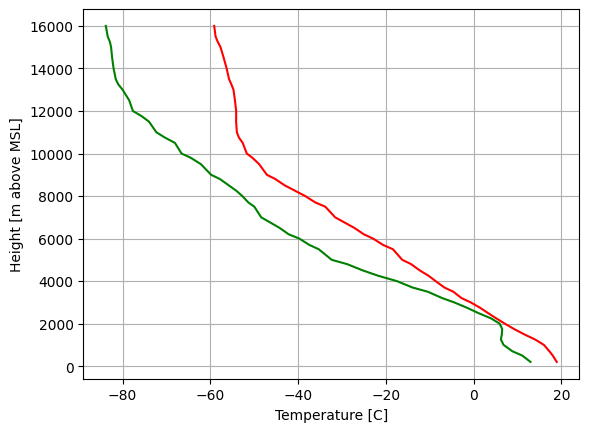

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


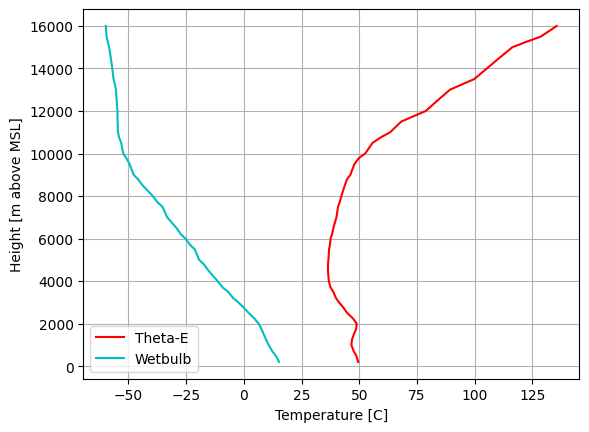

Most-Unstable CAPE: 988.77
Surface-based CAPE: 988.77
Most-Unstable LCL: 827.94
Most-Unstable LFC: 2050.0
Most-Unstable EL: 9411.11
Most-Unstable LI: -4.75
670-850 mb Lapse Rate: 8.57
850-950 mb Lapse Rate: 7.03
Maximum Lapse Rate: 8.2
MWPI: 2.7
T Totals: 58.11
K-index: 33.96
TEI: 12.92
MWPI WGP (kt): 39.9
SB CAPE =  988.7702027537583
MU CAPE =  988.7702027537583
CAPE Ratio =  0.0
Surface-based convection


In [9]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222_WS.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

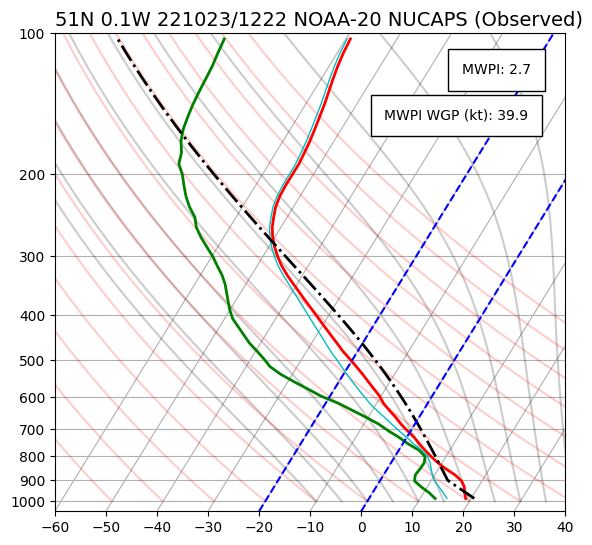

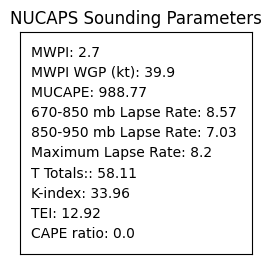

In [10]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('51N 0.1W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222_WS.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param_WS.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

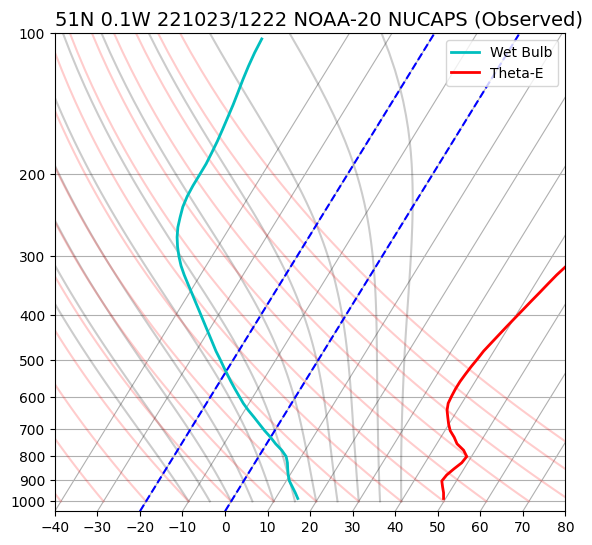

In [11]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('51N 0.1W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte_WS.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

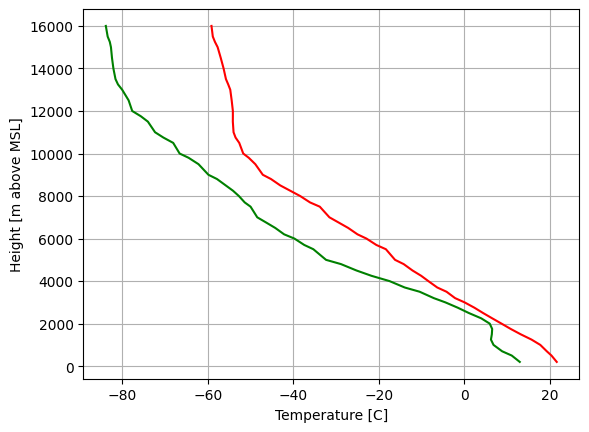

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


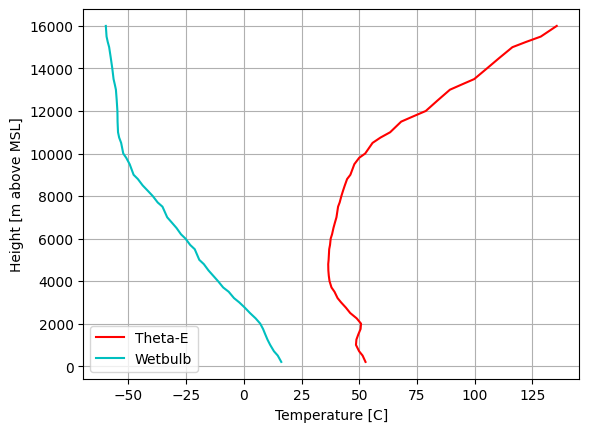

Most-Unstable CAPE: 1462.42
Surface-based CAPE: 1462.42
Most-Unstable LCL: 1157.7
Most-Unstable LFC: 2050.0
Most-Unstable EL: 9800.0
Most-Unstable LI: -6.44
670-850 mb Lapse Rate: 9.2
850-950 mb Lapse Rate: 7.63
Maximum Lapse Rate: 8.83
MWPI: 3.45
T Totals: 59.7
K-index: 34.89
TEI: 15.9
MWPI WGP (kt): 42.51
SB CAPE =  1462.4152581586782
MU CAPE =  1462.4152581586782
CAPE Ratio =  0.0
Surface-based convection


In [11]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222_WS_Tv.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

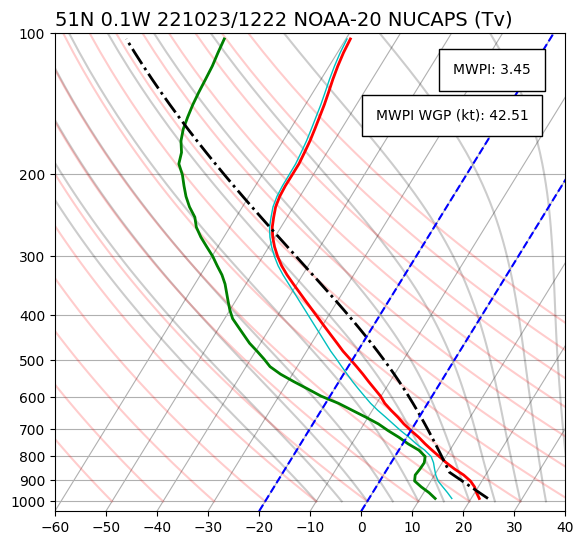

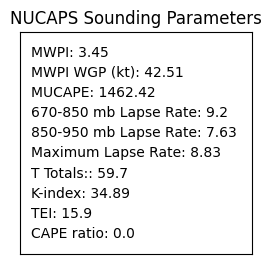

In [12]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('51N 0.1W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222_WS_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param_WS_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

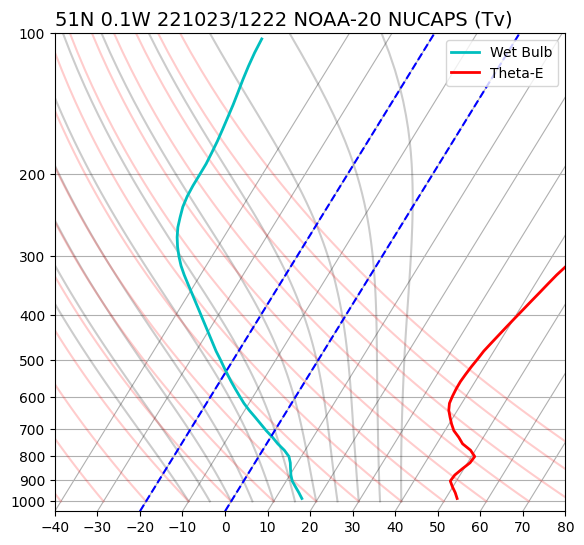

In [15]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('51N 0.1W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte_WS_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import re
from six import StringIO
from six import BytesIO
import pandas as pd

'''
NOAA-20 NUCAPS Profile at 1222 UTC 23 October 2022 52.8N/1.2W
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 8 8 . 0 1 5 6 2   1 9 6 . 7 1 8 7 5   2 1 0 . 9 0 6 2 5   2 2 7 . 2 1 8 7 5   2 4 1 . 3 2 8 1 2   2 5 0 . 8 5 9 3 8   2 5 6 . 0 4 6 8 8   2 5 8 . 3 4 3 7 5   2 5 8 . 7 0 3 1 2   2 5 7 . 4 0 6 2 5   2 5 4 . 7 3 4 3 8   2 4 9 . 3 1 2 5   2 4 3 . 3 1 2 5   2 3 7 . 9 2 1 8 8   2 3 2 . 6 7 1 8 8   2 2 8 . 7 9 6 8 8   2 2 5 . 0 7 8 1 2   2 2 2 . 4 2 1 8 8   2 1 9 . 9 8 4 3 8   2 1 8 . 0 4 6 8 8   2 1 6 . 3 5 9 3 8   2 1 5 . 3 2 8 1 2   2 1 4 . 4 2 1 8 8   2 1 3 . 6 7 1 8 8   2 1 2 . 9 3 7 5   2 1 2 . 3 4 3 7 5   2 1 1 . 9 3 7 5   2 1 1 . 7 9 6 8 8   2 1 1 . 6 8 7 5   2 1 1 . 6 5 6 2 5   2 1 1 . 6 2 5   2 1 1 . 6 8 7 5   2 1 1 . 7 8 1 2 5   2 1 1 . 7 3 4 3 8   2 1 1 . 6 4 0 6 2   2 1 1 . 5 1 5 6 2   2 1 1 . 4 2 1 8 8   2 1 1 . 5 6 2 5   2 1 1 . 8 2 8 1 2   2 1 2 . 2 9 6 8 8   2 1 2 . 8 4 3 7 5   2 1 3 . 5 1 5 6 2   2 1 4 . 1 8 7 5   2 1 4 . 7 8 1 2 5   2 1 5 . 3 1 2 5   2 1 5 . 8 7 5   2 1 6 . 5   2 1 7 . 0 7 8 1 2   2 1 7 . 5 1 5 6 2   2 1 7 . 7 9 6 8 8   2 1 8 . 0 1 5 6 2   2 1 8 . 1 2 5   2 1 8 . 1 0 9 3 8   2 1 8 . 0 7 8 1 2   2 1 7 . 9 8 4 3 8   2 1 7 . 9 0 6 2 5   2 1 8 . 0   2 1 8 . 4 6 8 7 5   2 1 9 . 4 0 6 2 5   2 2 0 . 4 3 7 5   2 2 1 . 8 9 0 6 2   2 2 3 . 5 6 2 5   2 2 5 . 4 2 1 8 8   2 2 7 . 4 0 6 2 5   2 2 9 . 5 9 3 7 5   2 3 1 . 9 0 6 2 5   2 3 4 . 2 3 4 3 8   2 3 6 . 5   2 3 8 . 7 5   2 4 0 . 9 6 8 7 5   2 4 3 . 1 2 5   2 4 5 . 3 9 0 6 2   2 4 7 . 6 4 0 6 2   2 4 9 . 8 2 8 1 2   2 5 2 . 1 5 6 2 5   2 5 4 . 4 8 4 3 8   2 5 6 . 6 8 7 5   2 5 8 . 8 2 8 1 2   2 6 0 . 8 7 5   2 6 2 . 7 6 5 6 2   2 6 4 . 1 5 6 2 5   2 6 6 . 1 8 7 5   2 6 7 . 9 8 4 3 8   2 6 9 . 5 9 3 7 5   2 7 1 . 4 2 1 8 8   2 7 3 . 1 4 0 6 2   2 7 4 . 4 8 4 3 8   2 7 6 . 0   2 7 7 . 6 7 1 8 8   2 7 9 . 5 6 2 5   2 8 1 . 7 8 1 2 5   2 8 4 . 2 1 8 7 5   2 8 6 . 4 8 4 3 8   2 8 8 . 1 0 9 3 8   2 8 9 . 5 6 2 5   2 9 0 . 2 1 8 7 5"
dewpt = "1 4 5 . 4 0 1 2   1 5 1 . 0 8 2 0 9   1 5 4 . 4 8 8 8 2   1 5 7 . 6 5 9 7 1   1 6 0 . 4 6 6 1 4   1 6 2 . 7 7 4 8 9   1 6 4 . 6 3 5 2 5   1 6 6 . 1 8 8 6 9   1 6 7 . 5 2 0 4 6   1 6 8 . 6 9 8 4 1   1 6 9 . 7 6 9 2 3   1 7 0 . 7 8 0 7 2   1 7 1 . 7 5 0 6 9   1 7 2 . 6 8 3 9 4   1 7 3 . 5 7 7 4 7   1 7 4 . 4 3 2 7 5   1 7 5 . 2 4 6 9 3   1 7 6 . 0 1 9 0 9   1 7 6 . 7 5 2 2 9   1 7 7 . 4 5 4 0 4   1 7 8 . 1 2 5 7 8   1 7 8 . 7 7 5 8   1 7 9 . 4 0 7 0 9   1 8 0 . 0 3 4 0 7   1 8 0 . 6 3 2 7 8   1 8 1 . 2 2 1 0 4   1 8 1 . 7 8 8 6 7   1 8 2 . 3 2 6 9 7   1 8 2 . 8 4 8 2   1 8 3 . 3 5 1 3 2   1 8 3 . 8 1 9 7   1 8 4 . 2 6 6 9   1 8 4 . 7 0 1 9   1 8 5 . 1 2 3 7 8   1 8 5 . 5 6 0 0 4   1 8 6 . 0 1 1 4 6   1 8 6 . 4 6 7 3   1 8 6 . 9 2 6 8 8   1 8 7 . 3 9 0 0 1   1 8 7 . 8 9 6 7 3   1 8 8 . 4 1 3 0 7   1 8 8 . 9 3 9 0 9   1 8 9 . 4 6 3 6 7   1 8 9 . 9 7 5 4 3   1 9 0 . 4 7 4 3   1 9 0 . 9 8 3 4 6   1 9 1 . 4 4 1 5 9   1 9 1 . 8 1 2 7 6   1 9 2 . 1 2 8 5 2   1 9 2 . 3 9 6 6 2   1 9 2 . 5 9 2 9 9   1 9 3 . 0 8 4 5 6   1 9 4 . 1 4 9 4 1   1 9 3 . 9 8 5 4 9   1 9 5 . 5 1 5 8 5   1 9 6 . 1 9 4 2 6   1 9 7 . 4 9 7 9 2   1 9 9 . 8 2 9 5 1   2 0 2 . 6 5 5 9 9   2 0 3 . 7 8 6 9 7   2 0 6 . 4 7 1 7   2 0 8 . 8 8 3 9 1   2 1 1 . 5 0 6 4   2 1 3 . 0 6 4 9 1   2 1 5 . 5 1 4 4 2   2 1 7 . 4 7 9 2   2 1 8 . 1 8 7 5 6   2 1 8 . 0 6 2 9 4   2 1 7 . 8 9 2 6 4   2 1 6 . 8 9 5 1 3   2 2 0 . 2 3 6 2 7   2 2 3 . 3 3 2 9 3   2 2 5 . 4 7 1 8 5   2 3 0 . 6 9 0 4   2 3 3 . 9 5 1 2 6   2 3 7 . 0 3 5 1 7   2 4 1 . 1 7 3 6 9   2 4 6 . 0 4 6 6 9   2 5 0 . 6 3 8 5 3   2 5 3 . 8 5 8 8 3   2 5 7 . 7 7 7 8 3   2 6 0 . 5 8 1 8 5   2 6 2 . 8 3 2 9 5   2 6 4 . 9 4 7 1 4   2 6 6 . 9 2 8 5 6   2 6 9 . 6 7 5 3   2 7 2 . 3 0 6 5 2   2 7 5 . 1 6 4 0 3   2 7 7 . 7 3 3 6   2 7 9 . 8 7   2 8 1 . 5 4 9 6 5   2 8 2 . 4 9 6 9 2   2 8 3 . 2 5 6 9   2 8 4 . 3 9 3 3   2 8 5 . 4 4 5 4   2 8 5 . 1 8 9 4"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
height_km = "prof_hgt.txt"
height_km = np.loadtxt(height_km, dtype='f', unpack=True)
print(height_km)
height_m = height_km * 1000
print(height_m,len(height_m))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 802.3)
idx_plo = np.where(press == 986.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
Te_sfc = thetae[idx_plo]
Te_top = thetae[idx_pup]
Tv_sfc = tempvirt_c[idx_plo]
Tv_top = tempvirt_c[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 1800
delta_zkm = 1.8
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_Te = (Te_sfc - Te_top)/(Z_lower - Z_upper)
gamma_Tv = (Tv_sfc - Tv_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)

print("")
print("Gamma = ", gamma)
if gamma > 4.8 and gamma <= 9.8:
    print("Conditional Instability") 
elif gamma > 9.8:
    print("Absolute Instability")
print("Theta-e Gamma = ", gamma_Te)
if gamma_Te < 0:
    print("Theta-e lapse rate is negative: potential instability")    
print("Tv Gamma = ", gamma_Tv)
print("Wetbulb Gamma = ", gamma_wb)
if gamma_wb > 4.8:
    print("Potential Instability")    

P_level_upper = pressure_pa[idx_pup]
P_level_lower = pressure_pa[idx_plo]
Z_upper = height_km[idx_pup]
Z_lower = height_km[idx_plo]
T_upper = temperature_c[idx_pup]
T_lower = temperature_c[idx_plo]
Tv_upper = tempvirt_c[idx_pup]
Tv_lower = tempvirt_c[idx_plo]
TD_upper = dewpoint_c[idx_pup]
TD_lower = dewpoint_c[idx_plo]
CAPE = 0
 
def MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE):
        gamma = (T_lower - T_upper)/(Z_upper - Z_lower)
        DD_upper = T_upper - TD_upper
        DD_lower = T_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP = (0.35435365777 * (MWPI**2)) + (1.2959855*MWPI) + 33.8176788
        return MWPI, WGP    
MWPI, WGP  = MWPI(P_level_upper, P_level_lower, Z_upper, Z_lower, T_upper, T_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI = ", MWPI)
print("MWPI WGP (kt) = ", WGP)

def MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE):
        gamma = (Tv_lower - Tv_upper)/(Z_upper - Z_lower)
        DD_upper = Tv_upper - TD_upper
        DD_lower = Tv_lower - TD_lower
        DDD = DD_lower - DD_upper
        MWPI_Tv = (CAPE/1000) + (gamma/5) + (DDD/5)
        WGP_Tv = (0.35435365777 * (MWPI_Tv**2)) + (1.2959855*MWPI_Tv) + 33.8176788
        return MWPI_Tv, WGP_Tv
MWPI_Tv, WGP_Tv  = MWPI_Tv(P_level_upper, P_level_lower, Z_upper, Z_lower, Tv_upper, Tv_lower, TD_upper, TD_lower, CAPE)    
print("")
print("MWPI from Virtual Temperature:")
print("MWPI = ", MWPI_Tv)
print("MWPI WGP (kt) = ", WGP_Tv)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = -9999.00
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)
df_ret = pd.DataFrame.from_dict(mydata)
print(df_ret)
wdir = []
wspd = []
wval = 0
data_len = len(df_ret)
print("DF Length = ", data_len)
for i in range(data_len):
    wdir.append(wval)
    wspd.append(wval)
print("wdir, wspd: ", wdir, wspd)
data_sharppy=dict(zip(('pres','hght','temp','dwpt'),(pressure_pa, height_m, temperature_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'temp', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "temp": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")
print("")

print("Sounding profile with virtual temperature")
print("")
data_sharppy=dict(zip(('pres','hght','tempvirt','dwpt'),(pressure_pa, height_m, tempvirt_c, dewpoint_c)))
print(data_sharppy)
df_sharppy = pd.DataFrame.from_dict(data_sharppy)
print(df_sharppy)
df_sharppy = df_sharppy[['pres', 'hght', 'tempvirt', 'dwpt']]
print(df_sharppy)
df_sharppy_wind =df_sharppy.assign(wdir = wdir, wspd = wspd)
print(df_sharppy_wind)
print("")
print("Sharppy formatted retrieval: ")
print("")
print(df_sharppy_wind.to_string(header=False, index=False, formatters={"pres": "  {:.2f},  ".format, "hght": "{:.2f},  ".format,
                                                                       "tempvirt": "{:.2f},  ".format, "dwpt": "{:.2f},  ".format,
                                                                       "wdir": "{:.2f},  ".format, "wspd": "{:.2f} ".format}))
print("")

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

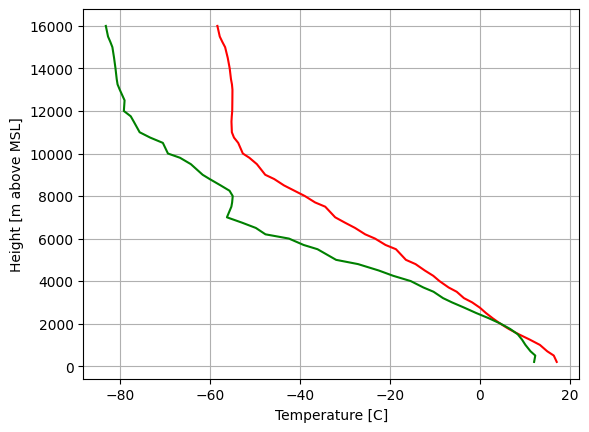

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


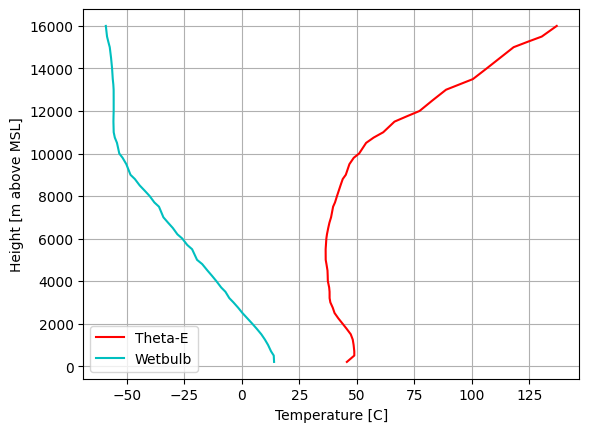

/data/home004/ken.pryor/.conda/envs/devel/lib/python3.9/site-packages/numpy/lib/function_base.py:1594: UserWarning: Warning: converting a masked element to nan.
  return interp_func(x, xp, fp, left, right)
/data/home004/ken.pryor/.conda/envs/devel/lib/python3.9/site-packages/SHARPpy-0+unknown-py3.9.egg/sharppy/sharptab/params.py:2275: RuntimeWarning: divide by zero encountered in double_scalars
  pcl.brn = pcl.bplus / pcl.brnshear


Most-Unstable CAPE: 1108.47
Surface-based CAPE: 567.47
Most-Unstable LCL: 837.64
Most-Unstable LFC: 1300.0
Most-Unstable EL: 9600.0
Most-Unstable LI: -4.77
670-850 mb Lapse Rate: 7.47
850-950 mb Lapse Rate: 8.1
Maximum Lapse Rate: 7.81
MWPI: 2.95
T Totals: 57.76
K-index: 32.66
TEI: 11.57
MWPI WGP (kt): 40.72
SB CAPE =  567.4667326485899
MU CAPE =  1108.473933516011
CAPE Ratio =  0.49
Hybrid Surface-based/elevated convection


In [1]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222_LL.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

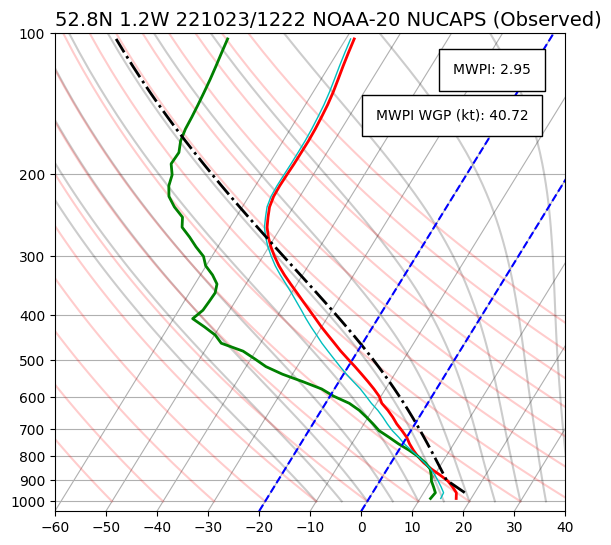

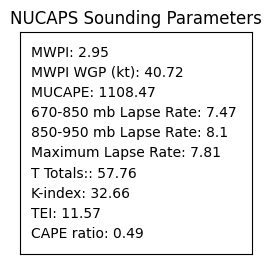

In [2]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('52.8N 1.2W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222_LL.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param_LL.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

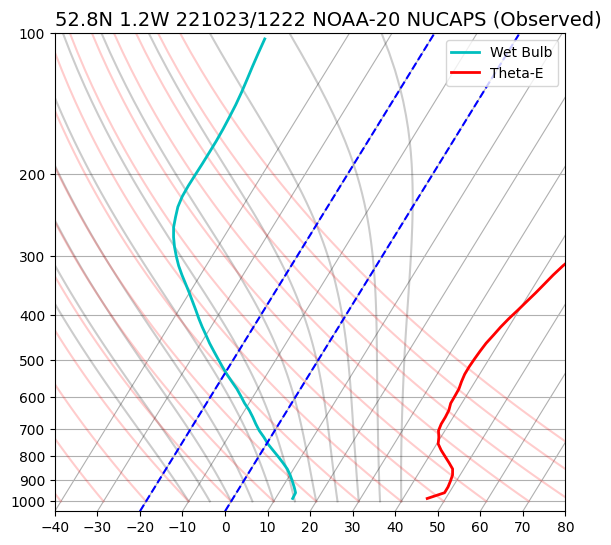

In [2]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('52.8N 1.2W 221023/1222 NOAA-20 NUCAPS (Observed)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte_LL.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

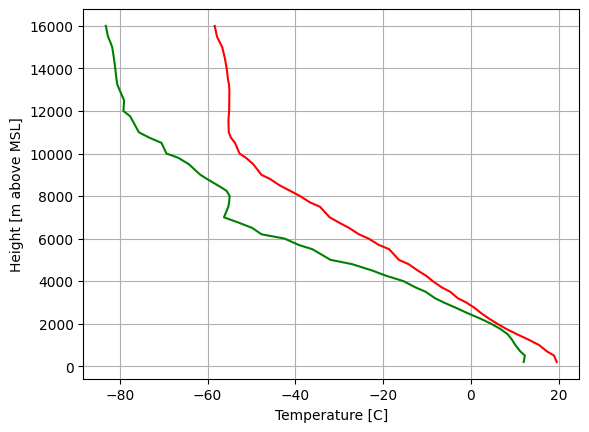

SURFACE HEIGHT (m MSL): 200.0
SURFACE HEIGHT (m AGL): 0.0
SURFACE HEIGHT (m MSL): 200.0


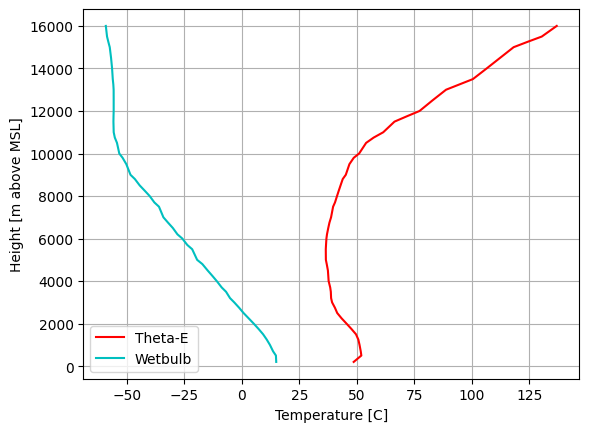

Most-Unstable CAPE: 1563.17
Surface-based CAPE: 977.4
Most-Unstable LCL: 1153.84
Most-Unstable LFC: 1397.5248603235452
Most-Unstable EL: 9997.05
Most-Unstable LI: -6.41
670-850 mb Lapse Rate: 8.21
850-950 mb Lapse Rate: 8.73
Maximum Lapse Rate: 7.92
MWPI: 3.61
T Totals: 59.56
K-index: 33.88
TEI: 14.37
MWPI WGP (kt): 43.11
SB CAPE =  977.4025144438513
MU CAPE =  1563.1726026277154
CAPE Ratio =  0.37
Hybrid Surface-based/elevated convection


In [3]:
import sharppy
import sharppy.sharptab.profile as profile
import sharppy.sharptab.interp as interp
import sharppy.sharptab.winds as winds
import sharppy.sharptab.utils as utils
import sharppy.sharptab.params as params
import sharppy.sharptab.thermo as thermo

spc_file = open('NUCAPS_NOAA20_1023_1222_LL_Tv.txt', 'r').read()

import numpy as np
from io import StringIO

def parseSPC(spc_file):
    """
        This function will read a SPC-style formatted observed sounding file,
        similar to that of the 14061619.OAX file included in the SHARPpy distribution.

        It will return the pressure, height, temperature, dewpoint, wind direction and wind speed data
        from that file.
    """
    ## read in the file
    data = np.array([l.strip() for l in spc_file.split('\n')])

    ## necessary index points
    title_idx = np.where( data == '%TITLE%')[0][0]
    start_idx = np.where( data == '%RAW%' )[0] + 1
    finish_idx = np.where( data == '%END%')[0]

    ## create the plot title
    data_header = data[title_idx + 1].split()
    location = data_header[0]
    time = data_header[1][:11]

    ## put it all together for StringIO
    full_data = '\n'.join(data[start_idx[0] : finish_idx[0]][:])
    sound_data = StringIO( full_data )

    ## read the data into arrays
    p, h, T, Td, wdir, wspd = np.genfromtxt( sound_data, delimiter=',', comments="%", unpack=True )

    return p, h, T, Td, wdir, wspd

pres, hght, tmpc, dwpc, wdir, wspd = parseSPC(spc_file)

prof = profile.create_profile(profile='default', pres=pres, hght=hght, tmpc=tmpc, \
                                    dwpc=dwpc, wspd=wspd, wdir=wdir, missing=-9999, strictQC=True)

import matplotlib.pyplot as plt
plt.plot(prof.tmpc, prof.hght, 'r-')
plt.plot(prof.dwpc, prof.hght, 'g-')
#plt.barbs(40*np.ones(len(prof.hght)), prof.hght, prof.u, prof.v)
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.grid()
plt.show()

msl_hght = prof.hght[prof.sfc] # Grab the surface height value
print("SURFACE HEIGHT (m MSL):",msl_hght)
agl_hght = interp.to_agl(prof, msl_hght) # Converts to AGL
print("SURFACE HEIGHT (m AGL):", agl_hght)
msl_hght = interp.to_msl(prof, agl_hght) # Converts to MSL
print("SURFACE HEIGHT (m MSL):",msl_hght)

plt.plot(thermo.ktoc(prof.thetae), prof.hght, 'r-', label='Theta-E')
plt.plot(prof.wetbulb, prof.hght, 'c-', label='Wetbulb')
plt.xlabel("Temperature [C]")
plt.ylabel("Height [m above MSL]")
plt.legend()
plt.grid()
plt.show()

def lapse_rate(prof, lower, upper, pres=True):
    '''
        Calculates the lapse rate (C/km) from a profile object

        Parameters
        ----------
        prof : profile object
            Profile Object
        lower : number
            Lower Bound of lapse rate (mb or m AGL)
        upper : number
            Upper Bound of lapse rate (mb or m AGL)
        pres : bool (optional; default = True)
            Flag to determine if lower/upper are pressure [True]
            or height [False]

        Returns
        -------
        lapse rate (C/km) : number
        '''
    if pres:
        if (prof.pres[-1] > upper): return ma.masked
        p1 = lower
        p2 = upper
        z1 = interp.hght(prof, lower)
        z2 = interp.hght(prof, upper)
    else:
        z1 = interp.to_msl(prof, lower)
        z2 = interp.to_msl(prof, upper)
        p1 = interp.pres(prof, z1)
        p2 = interp.pres(prof, z2)
    tv1 = interp.vtmp(prof, p1)
    tv2 = interp.vtmp(prof, p2)
    return (tv2 - tv1) / (z2 - z1) * -1000.

def max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000):
    '''
        Calculates the maximum lapse rate (C/km) between a layer at a specified interval

        Parameters
        ----------
        prof: profile object
            Profile object
        lower : number
            Lower bound in height (m)
        upper : number
            Upper bound in height (m)
        interval : number
            Interval to assess the lapse rate at (m)
        depth : number
            Depth of the layer to assess the lapse rate over (m)

        Returns
        -------
        max lapse rate (C/km) : float
        lower pressure of max lapse rate (mb) : number
        upper pressure of max lapse rate (mb) : number
    '''

    bottom_levels = interp.to_msl(prof, np.arange(lower, upper-depth+interval, interval))
    top_levels = interp.to_msl(prof, np.arange(lower+depth, upper+interval, interval))
    bottom_pres = interp.pres(prof, bottom_levels)
    top_pres = interp.pres(prof, top_levels)
    all_lapse_rates = (interp.vtmp(prof, top_pres) - interp.vtmp(prof, bottom_pres)) * -1000.
    max_lapse_rate_idx = np.ma.argmax(all_lapse_rates)
    return all_lapse_rates[max_lapse_rate_idx]/depth, bottom_pres[max_lapse_rate_idx], top_pres[max_lapse_rate_idx]

def mwpi(prof):
    '''
        Microburst Windspeed Potential Index (MWPI)

        Formulated by Kenneth Pryor NOAA/NESDIS/STAR
        
        The Microburst Windspeed Potential Index (MWPI) is designed to quantify the most relevant factors
        in convective downburst generation in intermediate thermodynamic environments by incorporating 1) surface-based
        CAPE, 2) the temperature lapse rate between the 670- and 850-mb levels, and 3) DDD between the 670- and
        850-mb levels. The MWPI formula consists of a set of predictor variables (i.e., dewpoint depression
        and temperature lapse rate) that generates output of the expected microburst risk. 
        Scaling factors of 1000 J/kg, 5 C/km, and 5 C, respectively, are applied to the MWPI algorithm
        to yield a unitless MWPI value that expresses wind gust potential on a scale from 1 to 5:

        MWPI = (CAPE/1000) + LR/5 + DDD/5 
        
        Reference:
        Pryor, K. L., 2015: Progress and Developments of Downburst Prediction Applications of GOES. Wea. Forecasting, 30, 1182–1200.
        
        Parameters
        ----------
        prof : Profile object

        Returns
        -------
        mwpi : number
            MWPI (unitless)
    '''
    sbpcl = getattr(prof, 'sfcpcl', params.parcelx(prof, flag=1))
    sb_cape = sbpcl.bplus
    
    mupcl = getattr(prof, 'mupcl', params.parcelx(prof, flag=1))
    mu_cape = mupcl.bplus
    lr_hi = lapse_rate(prof, 850, 670, pres=True)
    lr_lo = lapse_rate(prof, 950, 850, pres=True)
    sfc = prof.pres[prof.sfc]
    
    if lr_hi > lr_lo:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)
    elif sfc < 950:
    #MWPI calculation for 670-850 mb layer
        lr850_670 = lapse_rate(prof, 850, 670, pres=True)
        t670 = interp.temp(prof, 670.)
        t850 = interp.temp(prof, 850.)
        td670 = interp.dwpt(prof, 670.)
        td850 = interp.dwpt(prof, 850.)
        dd670 = t670 - td670
        dd850 = t850 - td850
        ddd = dd850 - dd670
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr850_670/5) + (ddd/5)    
    else:
    #MWPI calculation for surface-based mixed layer
        lr950_850 = lapse_rate(prof, 950, 850, pres=True)
        t850 = interp.temp(prof, 850.)
        t950 = interp.temp(prof, 950.)
        td850 = interp.dwpt(prof, 850.)
        td950 = interp.dwpt(prof, 950.)
        dd850 = t850 - td850
        dd950 = t950 - td950
        ddd = dd950 - dd850
        if ddd < 0:
            ddd = 0
        mwpi = (mu_cape/1000) + (lr950_850/5) + (ddd/5)
    
    return mwpi

sfcpcl = params.parcelx( prof, flag=1 ) # Surface Parcel
fcstpcl = params.parcelx( prof, flag=2 ) # Forecast Parcel
mupcl = params.parcelx( prof, flag=3 ) # Most-Unstable Parcel
mlpcl = params.parcelx( prof, flag=4 ) # 100 mb Mean Layer Parcel
mu_cape = mupcl.bplus
mucape = str(round(mupcl.bplus,2))
print("Most-Unstable CAPE:", mucape) # J/kg
sb_cape = sfcpcl.bplus
sbcape = str(round(sfcpcl.bplus,2))
print("Surface-based CAPE:", sbcape) # J/kg
lcl = round(mupcl.lclhght,2)
lfc = mupcl.lfchght
el = round(mupcl.elhght,2)
li = str(round(mupcl.li5,2))
print("Most-Unstable LCL:", lcl) # meters AGL
print("Most-Unstable LFC:", lfc) # meters AGL
print("Most-Unstable EL:", el) # meters AGL
print("Most-Unstable LI:", li) # C
lr_hi = str(round(lapse_rate(prof, 850, 670, pres=True),2))
print("670-850 mb Lapse Rate:", lr_hi)
lr_lo = str(round(lapse_rate(prof, 950, 850, pres=True),2))
print("850-950 mb Lapse Rate:", lr_lo)
lapse_rate_max, bottom_pres, top_pres = max_lapse_rate(prof, lower=2000, upper=6000, interval=250, depth=2000)
lr_max = str(round(lapse_rate_max,2))
print("Maximum Lapse Rate:", lr_max)
mwp = round(mwpi(prof),2)
mwp_str = str(mwp)
print("MWPI:", mwp_str) 
t_tot = str(round(params.t_totals(prof),2))
print("T Totals:", t_tot)
k_idx = str(round(params.k_index(prof),2))
print("K-index:", k_idx)
te_idx = str(round(params.tei(prof),2))
print("TEI:", te_idx)
#WGP = (0.35435365777 * ((params.mwpi(prof))**2)) + (1.2959855*(params.mwpi(prof))) + 33.8176788
WGP = (0.35435365777 * (mwp**2)) + (1.2959855*mwp) + 33.8176788
mwpi_gp = str(round(WGP,2))
print("MWPI WGP (kt):", mwpi_gp)
#Calculate CAPE ratio
cape_ratio = 1 - ((sb_cape/mu_cape))
caperat = str(round(cape_ratio,2))
print("SB CAPE = ", sb_cape)
print("MU CAPE = ", mu_cape)
print("CAPE Ratio = ", caperat)
if cape_ratio > 0.3 and cape_ratio < 0.7:
    print("Hybrid Surface-based/elevated convection") 
elif cape_ratio >= 0.7:
    print("Elevated convection")
else:
    print("Surface-based convection")

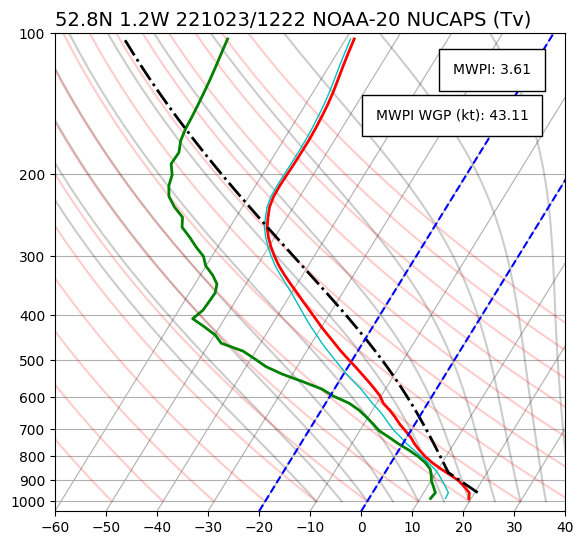

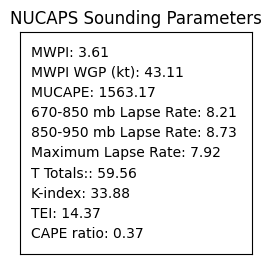

In [4]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('52.8N 1.2W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.tmpc, prof.pres, 'r', lw=2)
ax.semilogy(prof.dwpc, prof.pres, 'g', lw=2)
ax.semilogy(prof.wetbulb, prof.pres, 'c-', lw=1)

# Plot the parcel trace.
ax.semilogy(pcl.ttrace, pcl.ptrace, 'k-.', lw=2)

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-60,40)
xticks = np.arange(-60, 41, 10)
ax.set_xticks(xticks)

ax.text(-20, 120, r'MWPI: '+mwp_str, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
ax.text(-15, 150, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='right', va='center', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
# Show the plot to the user.
plt.savefig('skewt_noaa20_1023_1222_LL_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('NUCAPS Sounding Parameters')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 11])
ax.text(0.5, 10, r'MWPI: '+mwp_str, size=10, ha='left', va='center')
ax.text(0.5, 9, r'MWPI WGP (kt): '+mwpi_gp, size=10, ha='left', va='center')
ax.text(0.5, 8, r'MUCAPE: '+mucape, size=10, ha='left', va='center')
ax.text(0.5, 7, r'670-850 mb Lapse Rate: '+lr_hi, size=10, ha='left', va='center')
ax.text(0.5, 6, r'850-950 mb Lapse Rate: '+lr_lo, size=10, ha='left', va='center')
ax.text(0.5, 5, r'Maximum Lapse Rate: '+lr_max, size=10, ha='left', va='center')
ax.text(0.5, 4, r'T Totals:: '+t_tot, size=10, ha='left', va='center')
ax.text(0.5, 3, r'K-index: '+k_idx, size=10, ha='left', va='center')
ax.text(0.5, 2, r'TEI: '+te_idx, size=10, ha='left', va='center')
ax.text(0.5, 1, r'CAPE ratio: '+caperat, size=10, ha='left', va='center')
#ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('skewt_noaa20_1023_1222_param_LL_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()

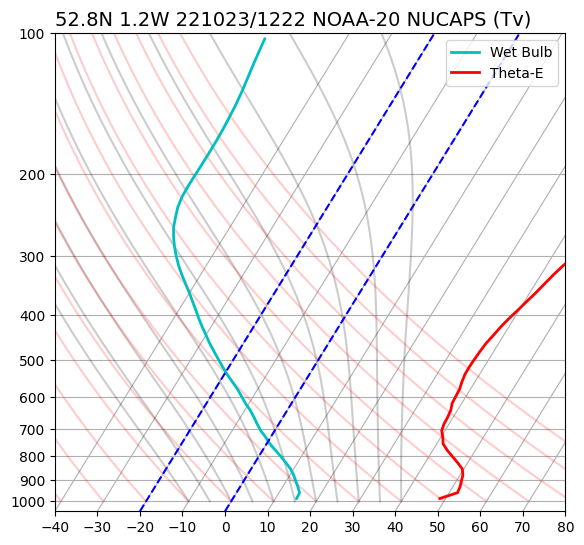

In [5]:
# Create a new figure. Plot a sounding emagram. The dimensions here give a good aspect ratio
import sharppy.plot.skew as skew
fig = plt.figure(figsize=(6.5875, 6.2125))
ax = fig.add_subplot(111, projection='skewx')
ax.grid(True)

# Select the Most-Unstable parcel (this can be changed)
pcl = mupcl

# Let's set the y-axis bounds of the plot.
pmax = 1000
pmin = 10
dp = -10
presvals = np.arange(int(pmax), int(pmin)+dp, dp)

# plot the moist-adiabats at surface temperatures -10 C to 45 C at 5 degree intervals.
for t in np.arange(-10,45,5):
    tw = []
    for p in presvals:
        tw.append(thermo.wetlift(1000., t, p))
    # Plot the moist-adiabat with a black line that is faded a bit.
    ax.semilogy(tw, presvals, 'k-', alpha=.2)

# A function to calculate the dry adiabats
def thetas(theta, presvals):
    return ((theta + thermo.ZEROCNK) / (np.power((1000. / presvals),thermo.ROCP))) - thermo.ZEROCNK

# plot the dry adiabats
for t in np.arange(-50,110,10):
    ax.semilogy(thetas(t, presvals), presvals, 'r-', alpha=.2)

# plot the title.
plt.title('52.8N 1.2W 221023/1222 NOAA-20 NUCAPS (Tv)', fontsize=14, loc='left')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dicatated by the typical meteorological plot
ax.semilogy(prof.wetbulb, prof.pres, 'c', lw=2, label='Wet Bulb')
ax.semilogy(thermo.ktoc(prof.thetae), prof.pres, 'r', lw=2, label='Theta-E')

# Denote the 0 to -20 C area on the Skew-T.
l = ax.axvline(0, color='b', linestyle='--')
l = ax.axvline(-20, color='b', linestyle='--')

# Set the log-scale formatting and label the y-axis tick marks.
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks(np.linspace(100,1000,10))
ax.set_ylim(1050,100)

# Label the x-axis tick marks.
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-40,80)
xticks = np.arange(-40, 81, 10)
ax.set_xticks(xticks)

# Show the plot to the user.
plt.legend()
plt.savefig('skewt_noaa20_1023_1222_wbte_LL_Tv.png', bbox_inches='tight') # saves the plot to the disk.
plt.show()